## Работа с данными

In [118]:
from tensorflow import keras
from tensorflow.keras import layers

In [119]:
#Загружаем данные
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

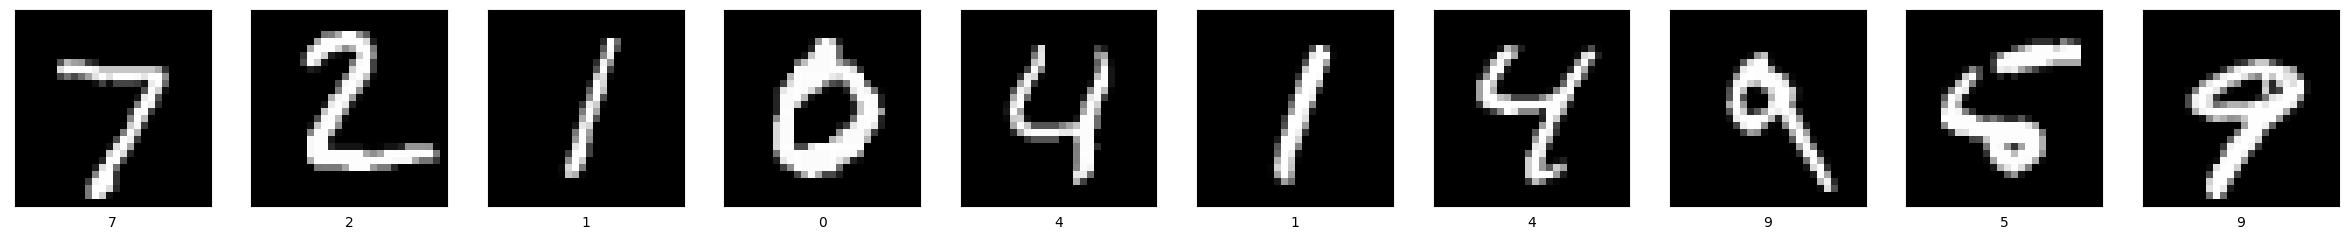

In [120]:
import matplotlib.pyplot as plt
#Заполняем массив классов чисел (от 0 до 9)
class_names = [0]*10
for i in range(10):
  class_names[i] = str(i)
#Выводим примеры
plt.figure(figsize=(30,30))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
  plt.xlabel(class_names[y_test[i]]) 

In [121]:

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [122]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Зарезервируем 10,000 примеров для валидации
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [123]:
# Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Минимизируемая функция потерь
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # Список метрик для мониторинга
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Обучим модель разбив данные на "пакеты"
# размером "batch_size", и последовательно итерируя
# весь датасет заданное количество "эпох"
print('# Обучаем модель на тестовых данных')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=8,
                    # Мы передаем валидационные данные для
                    # мониторинга потерь и метрик на этих данных
                    # в конце каждой эпохи
                    validation_data=(x_val, y_val))

# Обучаем модель на тестовых данных
Epoch 1/8
782/782 [==============================] - 2s 2ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.9028 - val_loss: 0.1901 - val_sparse_categorical_accuracy: 0.9454
Epoch 2/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1612 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.1567 - val_sparse_categorical_accuracy: 0.9540
Epoch 3/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9650 - val_loss: 0.1153 - val_sparse_categorical_accuracy: 0.9669
Epoch 4/8
782/782 [==============================] - 2s 2ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9713 - val_loss: 0.1022 - val_sparse_categorical_accuracy: 0.9712
Epoch 5/8
782/782 [==============================] - 2s 2ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.1056 - val_sparse_categorical_accuracy: 0.9707
Epoch 6/8
782/782 [==============================] - 2s 2ms/step - lo

In [124]:

# Возвращаемый объект "history" содержит записи
# значений потерь и метрик во время обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных, используя "evaluate"
print('\n# Оцениваем на тестовых данных')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Сгенерируем прогнозы (вероятности - выходные данные последнего слоя)
# на новых данных с помощью "predict"
print('\n# Генерируем прогнозы для 3 образцов')
predictions = model.predict(x_test[:3])
print('размерность прогнозов:', predictions.shape)


history dict: {'loss': [0.34355539083480835, 0.16120803356170654, 0.11722942441701889, 0.09399690479040146, 0.07726224511861801, 0.06640484184026718, 0.05791521072387695, 0.05069126933813095], 'sparse_categorical_accuracy': [0.9028199911117554, 0.9520599842071533, 0.9649999737739563, 0.971340000629425, 0.9764800071716309, 0.9798600077629089, 0.982479989528656, 0.9843199849128723], 'val_loss': [0.1901293396949768, 0.15665395557880402, 0.11533603817224503, 0.10219224542379379, 0.10558611154556274, 0.10146110504865646, 0.0966414213180542, 0.10460513830184937], 'val_sparse_categorical_accuracy': [0.9453999996185303, 0.9539999961853027, 0.9668999910354614, 0.9711999893188477, 0.9707000255584717, 0.9729999899864197, 0.9743000268936157, 0.9740999937057495]}

# Оцениваем на тестовых данных
79/79 [==============================] - 0s 2ms/step - loss: 0.0976 - sparse_categorical_accuracy: 0.9721
test loss, test acc: [0.09757532179355621, 0.972100019454956]

# Генерируем прогнозы для 3 образцов


In [127]:
import matplotlib.pyplot as plt
#Заполняем массив классов чисел (от 0 д#Загружаем данные
(), (x_test_tt,) = mnist.load_data()
class_names = [0]*10
for i in range(10):
  class_names[i] = str(i)

predicts = model.predict(x_test[:10])

#Выводим примеры
plt.figure(figsize=(30,30))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test_tt[i], cmap=plt.get_cmap('gray'))
  predict = predicts[i]
  predict_val = predict.index(max(predict))
  plt.xlabel(class_names[predict_val]) 

ValueError: in user code:

    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Depo\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)
